In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('Data/goog.us.txt')
df['Date'] = pd.to_datetime(df['Date'])

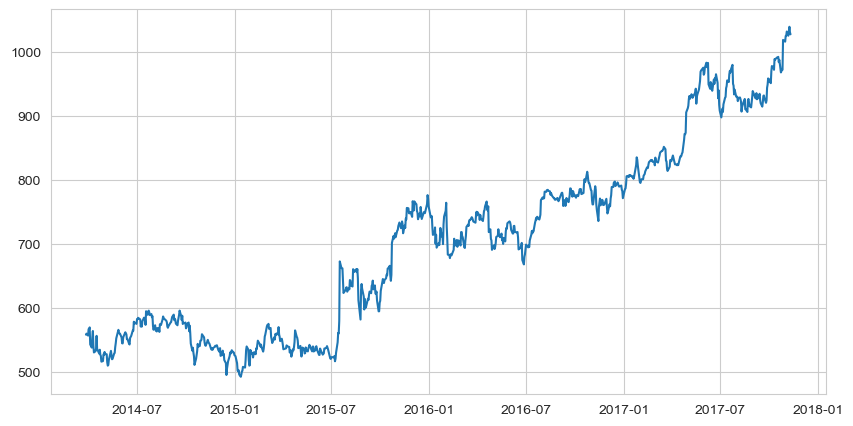

In [3]:
fig, ax = plt.subplots(figsize=(10, 5))

plt.plot(df['Date'], df['Close'], label='Close')

plt.show()

In [4]:
train = df[df['Date'] < '2017-01-01']

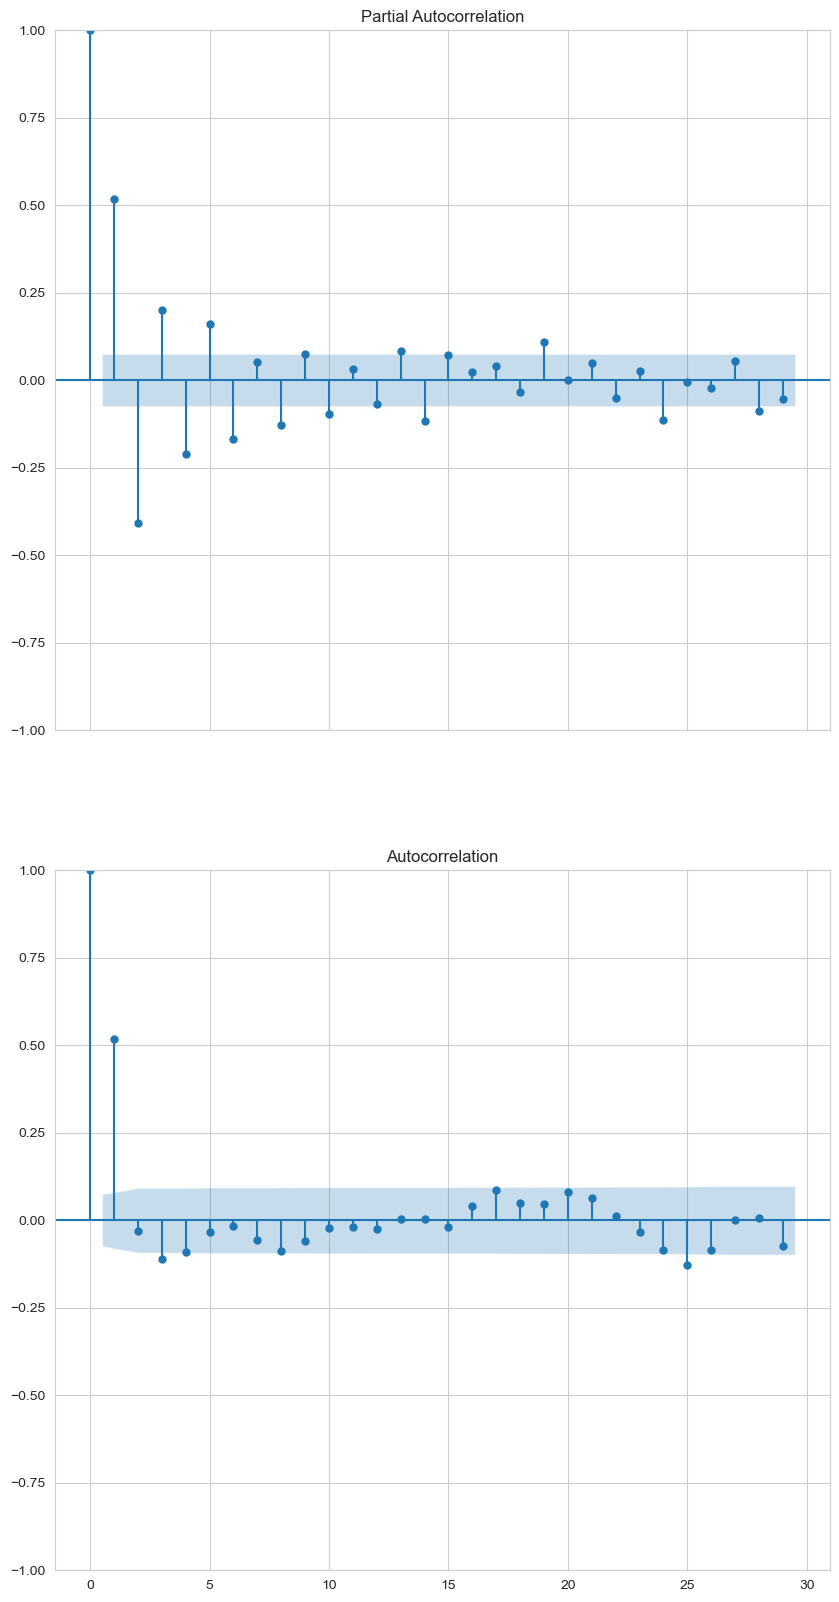

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(10, 20), sharex=True, sharey=True)

plot_pacf(train['Close'].diff(2).dropna(), ax=ax[0])
plot_acf(train['Close'].diff(2).dropna(), ax=ax[1])

plt.show()

In [6]:
result = adfuller(train['Close'])

d = result[1]

print(d)

0.7639342912479306


In [14]:
arima = ARIMA(train['Close'], order=(20, 1, 2))

model_fit = arima.fit()

C:\Users\simsh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


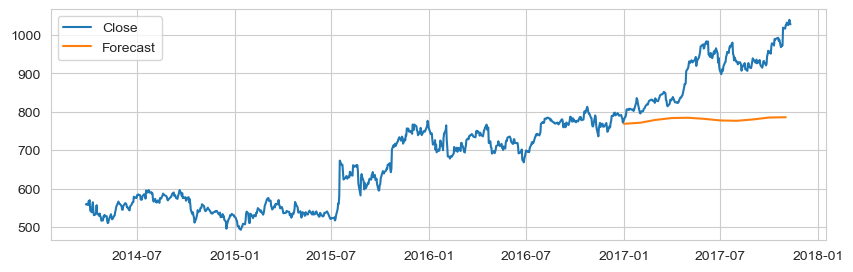

In [15]:
fig, ax = plt.subplots(figsize=(10, 3))

date_range = pd.date_range('2017-01-01', df.Date.max(), freq='MS')

forecast = model_fit.forecast(len(date_range))

plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(date_range, model_fit.forecast(len(date_range)), label='Forecast')

plt.legend()

plt.show()